# Time Series Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Milk Datset

In [5]:
df = pd.read_csv("./Assignment/Assign_28_Dec/train.csv", index_col=0)
df.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,,,,,,,,
1379560,1,55,1885,136.83,152.29,0,0,177
1466964,1,55,1993,136.83,135.83,0,0,270
1346989,1,55,2539,134.86,135.86,0,0,189
1338232,1,55,2139,339.50,437.53,0,0,54
1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
df['week'].value_counts()

week
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: count, Length: 145, dtype: int64

<Axes: xlabel='week', ylabel='num_orders'>

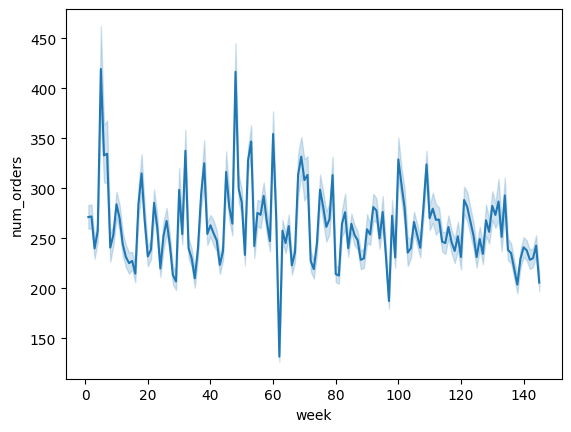

In [12]:
sns.lineplot(x=df['week'], y=df['num_orders'])

In [14]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'meal_id',
       'week', 'center_id', 'base_price', 'checkout_price'],
      dtype='object')

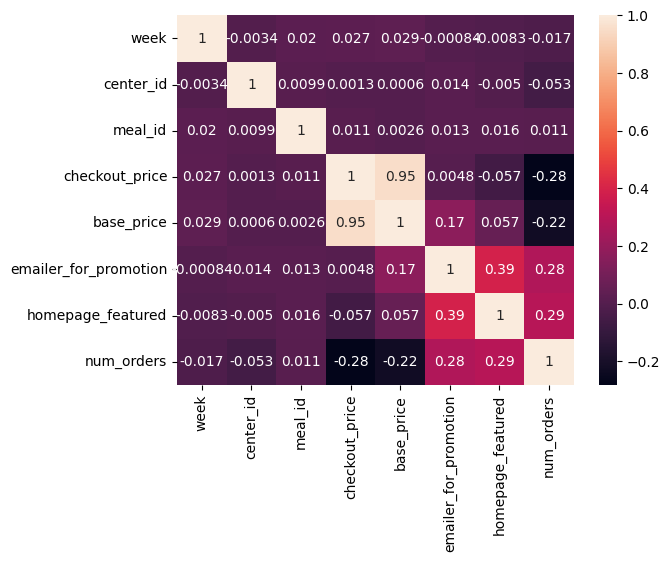

In [15]:
sns.heatmap(correlation,annot=True)
plt.show()

In [16]:
features = columns.drop(['num_orders'])
main_data2 = df[features]
X = main_data2.values
y = df['num_orders'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [17]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.6787336190599477

In [19]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(x_train, y_train)
y_pred = XG.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
print(RMSEL)


0.9341904515875917


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
y_pred = GB.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


0.9149786846937447

In [21]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


0.5235156072992327

In [22]:
from lightgbm import LGBMRegressor,plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.model_selection import GridSearchCV


c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [23]:
from lightgbm import LGBMRegressor
lgb_model=LGBMRegressor(importance_type='gain')
lgbm_params = {
    "n_estimators":[230,260],
    "num_leaves":[41,51],
    'min_child_samples':[40,45,50],
    'random_state':[2019]
  
}
lgb_model.set_params(**lgbm_params) #base model

LGBMRegressor(importance_type='gain', min_child_samples=[40, 45, 50],
              n_estimators=[230, 260], num_leaves=[41, 51],
              random_state=[2019])

In [24]:
lgb_grid=GridSearchCV(lgb_model,lgbm_params,cv=5,scoring='neg_mean_squared_error',n_jobs=8)

In [25]:
model=lgb_grid.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 342411, number of used features: 7
[LightGBM] [Info] Start training from score 262.098907


In [26]:
lgb_estimate=model.best_estimator_
lgb_estimate

LGBMRegressor(importance_type='gain', min_child_samples=45, n_estimators=260,
              num_leaves=51, random_state=2019)

In [27]:
y_pred=model.predict(x_test)
y_pred

array([154.66147721, 370.98586925, 198.50259727, ...,   4.3497642 ,
        13.22305223,  55.10907196])

In [28]:
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


0.7861667561981508

In [29]:
df_test = pd.read_csv("./Assignment/Assign_28_Dec/test_QoiMO9B.csv", index_col=0)
df_test.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
id,,,,,,,
1028232,146,55,1885,158.11,159.11,0,0
1127204,146,55,1993,160.11,159.11,0,0
1212707,146,55,2539,157.14,159.14,0,0
1082698,146,55,2631,162.02,162.02,0,0
1400926,146,55,1248,163.93,163.93,0,0


In [30]:
list_model = [DTR, XG, GB, RF, lgb_estimate]
list_pred = []
for model in list_model:
    y_pred = model.predict(df_test[features].values)
    y_pred[y_pred<0] = 0
    list_pred.append(y_pred)

final_pred = np.mean(list_pred, axis=0)
final_pred

array([404.62427511, 184.73725333, 169.68082136, ..., 359.23647361,
       265.74313004, 214.09928108])